##### 影像的旋轉、翻轉和改變尺寸
這篇教學會介紹 OpenCV 裡的 transpose()、flip()、rotate() 和 reize() 方法，透過這些方法，可以將影像進行旋轉、上下左右翻轉以及改變尺寸。

因為程式中的 OpenCV 會需要使用鏡頭或 GPU，所以請使用本機環境或使用 Anaconda Jupyter 進行實作，\
並安裝 OpenCV 函式庫 ( 參考：[OpenCV 函式庫](https://steam.oxxostudio.tw/category/python/ai/opencv.html) )。

##### flip() 翻轉影像 
使用 flip() 方法，可以將影像上下左右翻轉，flip 有一個參數，參數設定如下：

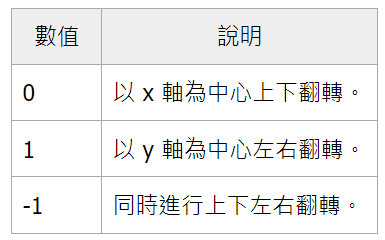

下方的程式碼，會產生三張圖，一張上下翻轉，一張左右翻轉，一張上下左右翻轉。

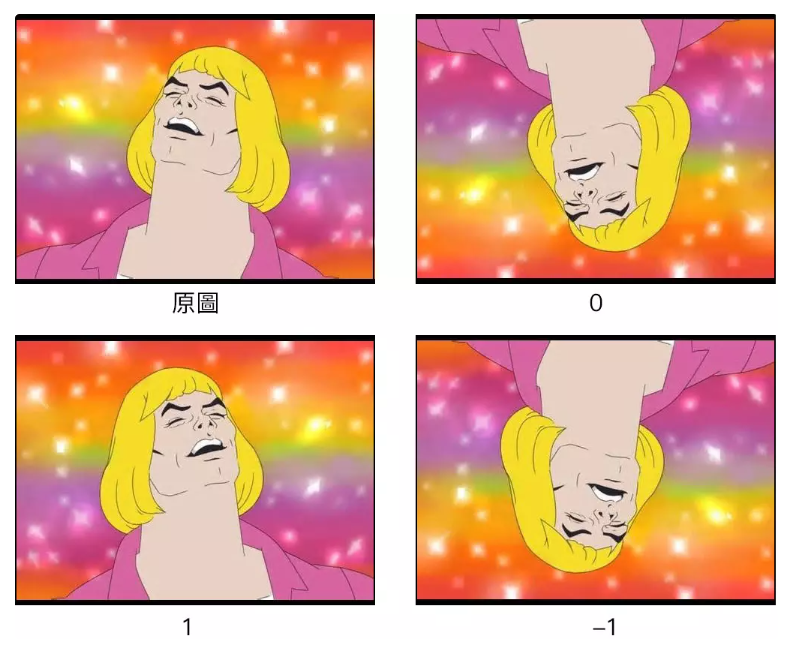

In [ ]:
import cv2
img = cv2.imread('meme.jpg')   # 開啟圖片
output_0 = cv2.flip(img, 0)    # 上下翻轉
output_1 = cv2.flip(img, 1)    # 左右翻轉
output_2 = cv2.flip(img, -1)   # 上下左右翻轉
cv2.imwrite('meme_0.jpg', output_0)
cv2.imwrite('meme_1.jpg', output_1)
cv2.imwrite('meme_2.jpg', output_2)

##### transpose() 旋轉影像 
使用 transpose() 方法，可以將影像「逆時針」旋轉 90 度，下方的程式碼，會產生一張逆時針旋轉 90 度的圖片。

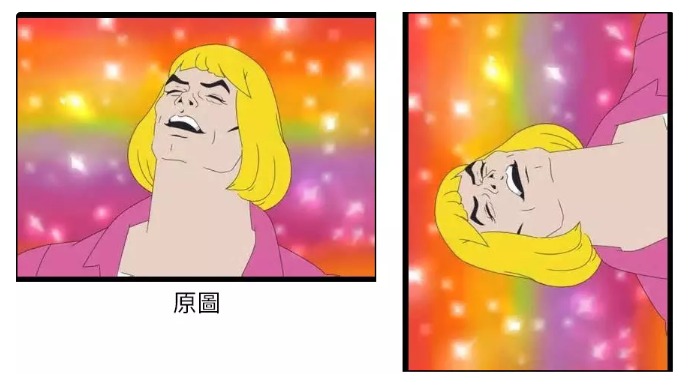

In [ ]:
import cv2
img = cv2.imread('meme.jpg')
output = cv2.transpose(img)    # 逆時針旋轉 90 度。
cv2.imwrite('output.jpg', output)

##### rotate() 旋轉影像 
有別於 transpose() 方法一次只能逆時針旋轉 90 度，rotate() 方法可以設定逆時針旋轉 90 度、順時針旋轉 90 度，以及旋轉 180 度。

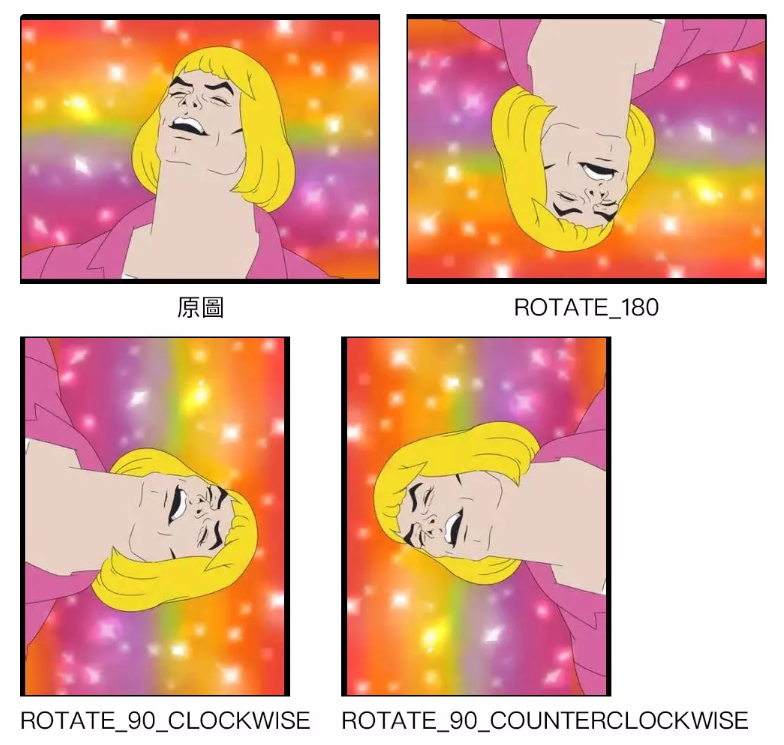

In [ ]:
import cv2
img = cv2.imread('meme.jpg')
output_ROTATE_90_CLOCKWISE = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
output_ROTATE_90_COUNTERCLOCKWISE = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
output_ROTATE_180 = cv2.rotate(img, cv2.ROTATE_180)
cv2.imwrite('output_1.jpg', output_ROTATE_90_CLOCKWISE)
cv2.imwrite('output_2.jpg', output_ROTATE_90_COUNTERCLOCKWISE)
cv2.imwrite('output_3.jpg', output_ROTATE_180)

##### reize() 改變尺寸 
使用 reize() 方法，可以將影像輸出為指定的尺寸，下方的程式碼，會產生兩張不同尺寸的圖片。

* 使用 reize() 方法時，可以設定 interpolation 參數，指定改變尺寸的插值方式，預設使用 INTER_LINEAR ( 完整名稱參考：[InterpolationFlags](https://docs.opencv.org/4.x/da/d54/group__imgproc__transform.html#ga5bb5a1fea74ea38e1a5445ca803ff121) )

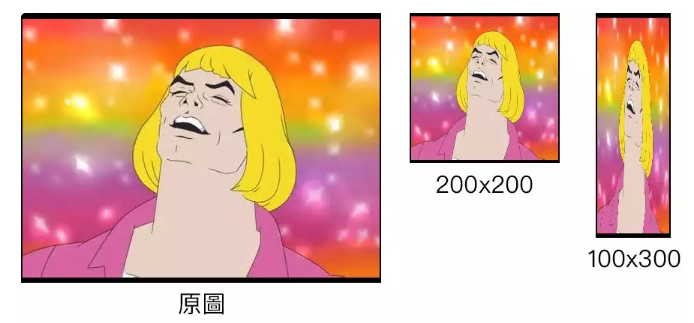

In [ ]:
import cv2
img = cv2.imread('meme.jpg')
output_1 = cv2.resize(img, (200, 200))   # 產生 200x200 的圖
output_2 = cv2.resize(img, (100, 300))   # 產生 100x300 的圖
cv2.imwrite('output_1.jpg', output_1)
cv2.imwrite('output_2.jpg', output_2)

##### 翻轉影片、改變影片尺寸 
延伸「寫入並儲存影片」文章的範例，將讀取到的影像縮小為 640x360，並進行上下翻轉的效果。

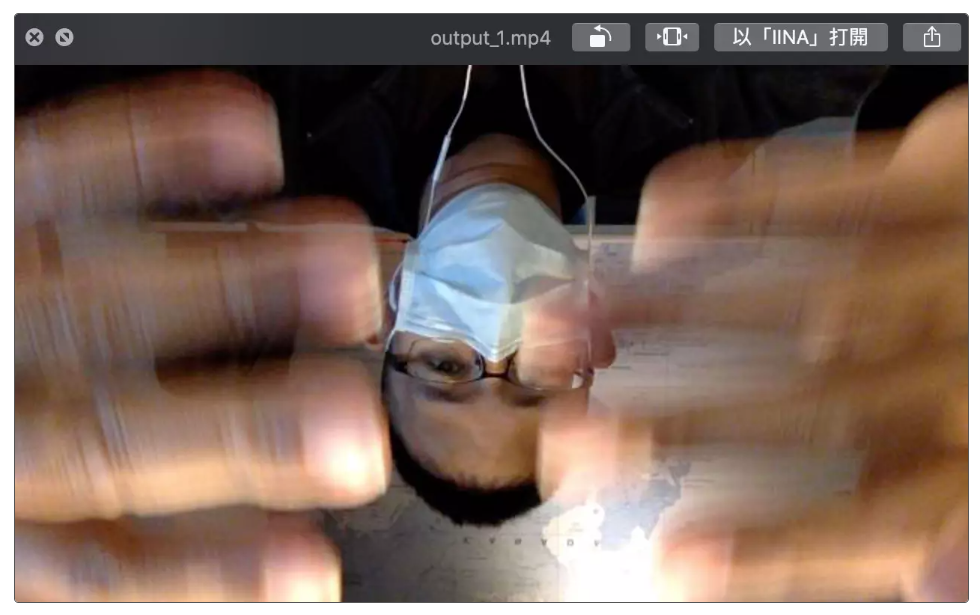

In [ ]:
import cv2
cap = cv2.VideoCapture(0)                         # 讀取電腦攝影機鏡頭影像。
fourcc = cv2.VideoWriter_fourcc(*'MJPG')          # 設定影片的格式為 MJPG
out = cv2.VideoWriter('output_1.mp4', fourcc, 20.0, (640,  360))  # 產生空的影片，尺寸為 640x360
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    ret, frame = cap.read()
    if not ret:
        print("Cannot receive frame")
        break
    img_1 = cv2.resize(frame,(640, 360))   # 改變圖片尺寸
    img_2 = cv2.flip(img_1, 0)             # 上下翻轉
    out.write(img_2)                       # 將取得的每一幀圖像寫入空的影片
    cv2.imshow('oxxostudio', frame)
    if cv2.waitKey(1) == ord('q'):
        break                              # 按下 q 鍵停止
cap.release()
out.release()      # 釋放資源
cv2.destroyAllWindows()